# Mental Fitness Tracker

Project on mental fitness tracker using different machine learning Regression algorithms

In [5]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import plotly.express as px

In [8]:
df1= pd.read_csv('mental-disease.csv')

df2= pd.read_csv('prevalence-disorder.csv')

df4= pd.read_csv('share-ms-disorder.csv')

print(df4.head(2))

        Entity      Code  Year  \
0     Abkhazia  OWID_ABK  2015   
1  Afghanistan       AFG  1990   

   Prevalence - Mental and substance use disorders - Sex: Male - Age: Age-standardized (Percent)  \
0                                                NaN                                               
1                                          17.448695                                               

   Prevalence - Mental and substance use disorders - Sex: Female - Age: Age-standardized (Percent)  \
0                                                NaN                                                 
1                                          17.634233                                                 

   Population (historical estimates) Continent  
0                                NaN      Asia  
1                         12412311.0       NaN  


In [9]:
df1.columns=['Country','Code','Year','Mental_Fitness_Rating']
df4.columns=['Country','Code','Year','Mental_disorder_Male','Mental_disorder_Female','Population','Continent']

In [10]:
df4.isnull().sum()

Country                       0
Code                       2550
Year                          0
Mental_disorder_Male      50161
Mental_disorder_Female    50161
Population                  973
Continent                 56344
dtype: int64

In [11]:
df2.columns=['Country','Code','Year','Schizophrenia','Bipolar Disorder','Eating disorders','Anxiety disorders','Drug use disorders','Depressive disorders','Alcohol use disorders']

In [12]:
print(df2.head(2))

       Country Code  Year  Schizophrenia  Bipolar Disorder  Eating disorders  \
0  Afghanistan  AFG  1990       0.228979          0.721207          0.131001   
1  Afghanistan  AFG  1991       0.228120          0.719952          0.126395   

   Anxiety disorders  Drug use disorders  Depressive disorders  \
0           4.835127            0.454202              5.125291   
1           4.821765            0.447112              5.116306   

   Alcohol use disorders  
0               0.444036  
1               0.444250  


In [13]:
df3=pd.merge(df2,df1)
print(df3.head())

       Country Code  Year  Schizophrenia  Bipolar Disorder  Eating disorders  \
0  Afghanistan  AFG  1990       0.228979          0.721207          0.131001   
1  Afghanistan  AFG  1991       0.228120          0.719952          0.126395   
2  Afghanistan  AFG  1992       0.227328          0.718418          0.121832   
3  Afghanistan  AFG  1993       0.226468          0.717452          0.117942   
4  Afghanistan  AFG  1994       0.225567          0.717012          0.114547   

   Anxiety disorders  Drug use disorders  Depressive disorders  \
0           4.835127            0.454202              5.125291   
1           4.821765            0.447112              5.116306   
2           4.801434            0.441190              5.106558   
3           4.789363            0.435581              5.100328   
4           4.784923            0.431822              5.099424   

   Alcohol use disorders  Mental_Fitness_Rating  
0               0.444036               1.696670  
1               0.4442

In [14]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                6840 non-null   object 
 1   Code                   6150 non-null   object 
 2   Year                   6840 non-null   int64  
 3   Schizophrenia          6840 non-null   float64
 4   Bipolar Disorder       6840 non-null   float64
 5   Eating disorders       6840 non-null   float64
 6   Anxiety disorders      6840 non-null   float64
 7   Drug use disorders     6840 non-null   float64
 8   Depressive disorders   6840 non-null   float64
 9   Alcohol use disorders  6840 non-null   float64
 10  Mental_Fitness_Rating  6840 non-null   float64
dtypes: float64(8), int64(1), object(2)
memory usage: 641.2+ KB
None


In [15]:
df3.isnull().sum()

Country                    0
Code                     690
Year                       0
Schizophrenia              0
Bipolar Disorder           0
Eating disorders           0
Anxiety disorders          0
Drug use disorders         0
Depressive disorders       0
Alcohol use disorders      0
Mental_Fitness_Rating      0
dtype: int64

In [16]:
df3.drop('Code',axis=1,inplace=True)

In [17]:
df3.size,df3.shape

(68400, (6840, 10))

## Data Visualization

[]

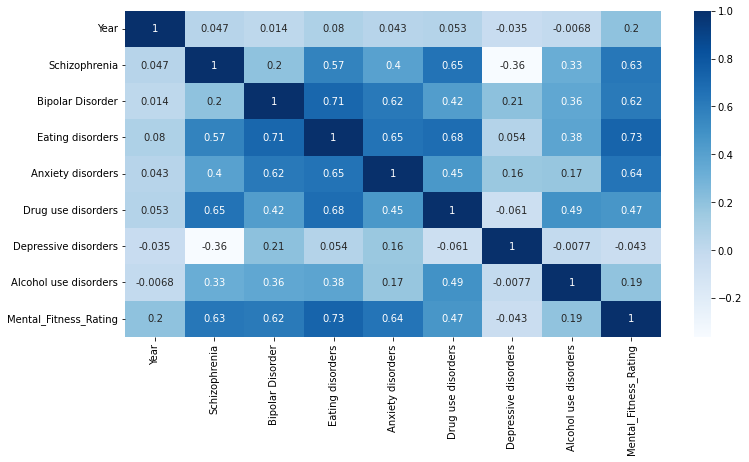

In [18]:
plt.figure(figsize=(12,6))
sn.heatmap(df3.corr(),annot=True,cmap='Blues')
plt.plot()

In [19]:
import plotly.express as px

# Assuming 'df3' is the DataFrame with columns 'Country' and 'Mental_Fitness_Rating'
fig = px.choropleth(df3, 
                    locations='Country', 
                    locationmode='country names',  # Use 'country names' for automatic country name matching
                    color='Mental_Fitness_Rating',
                    color_continuous_scale='Blues',  # Choose a colorscale that suits your data
                    projection='mercator',  # Use 'mercator' projection
                    hover_name='Country',  # Column to display on hover
                    title='Mental Fitness Rating by Country',
)

fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="LightGrey", showocean=True, oceancolor="LightBlue")

fig.show()

In [20]:
fig = px.box(df3, x='Year', y='Mental_Fitness_Rating', title='Mental Fitness Rating by Country',
             labels={'Mental_Fitness_Rating': 'Mental Fitness Rating', 'Country': 'Country'})

fig.show()


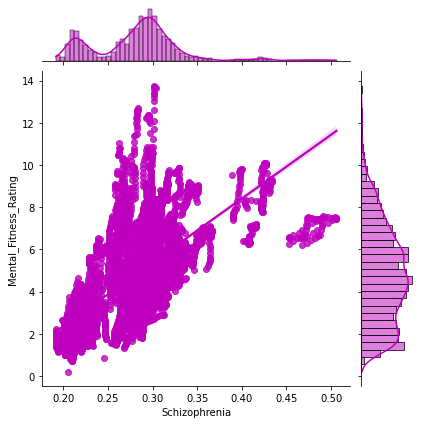

In [21]:
sn.jointplot('Schizophrenia','Mental_Fitness_Rating',df3,kind='reg',color='m')
plt.show()

In [22]:
fig3 = px.pie(df3, values='Mental_Fitness_Rating' ,names='Year' )
fig3.show()

Text(0, 0.5, 'Mental_Fitness_Rating(%)')

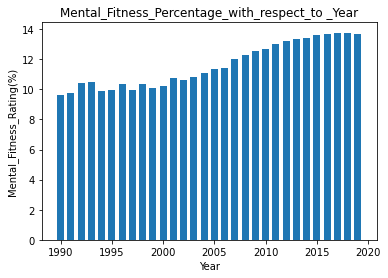

In [23]:
plt.bar(x=df3.Year,height= df3.Mental_Fitness_Rating,width=0.7,align='center')
plt.title('Mental_Fitness_Percentage_with_respect_to _Year')
plt.xlabel('Year')
plt.ylabel('Mental_Fitness_Rating(%)')

In [14]:
fig=px.bar(df3.head(10),x='Year',y='Mental_Fitness_Rating',color='Year',template='ggplot2')
fig.show()

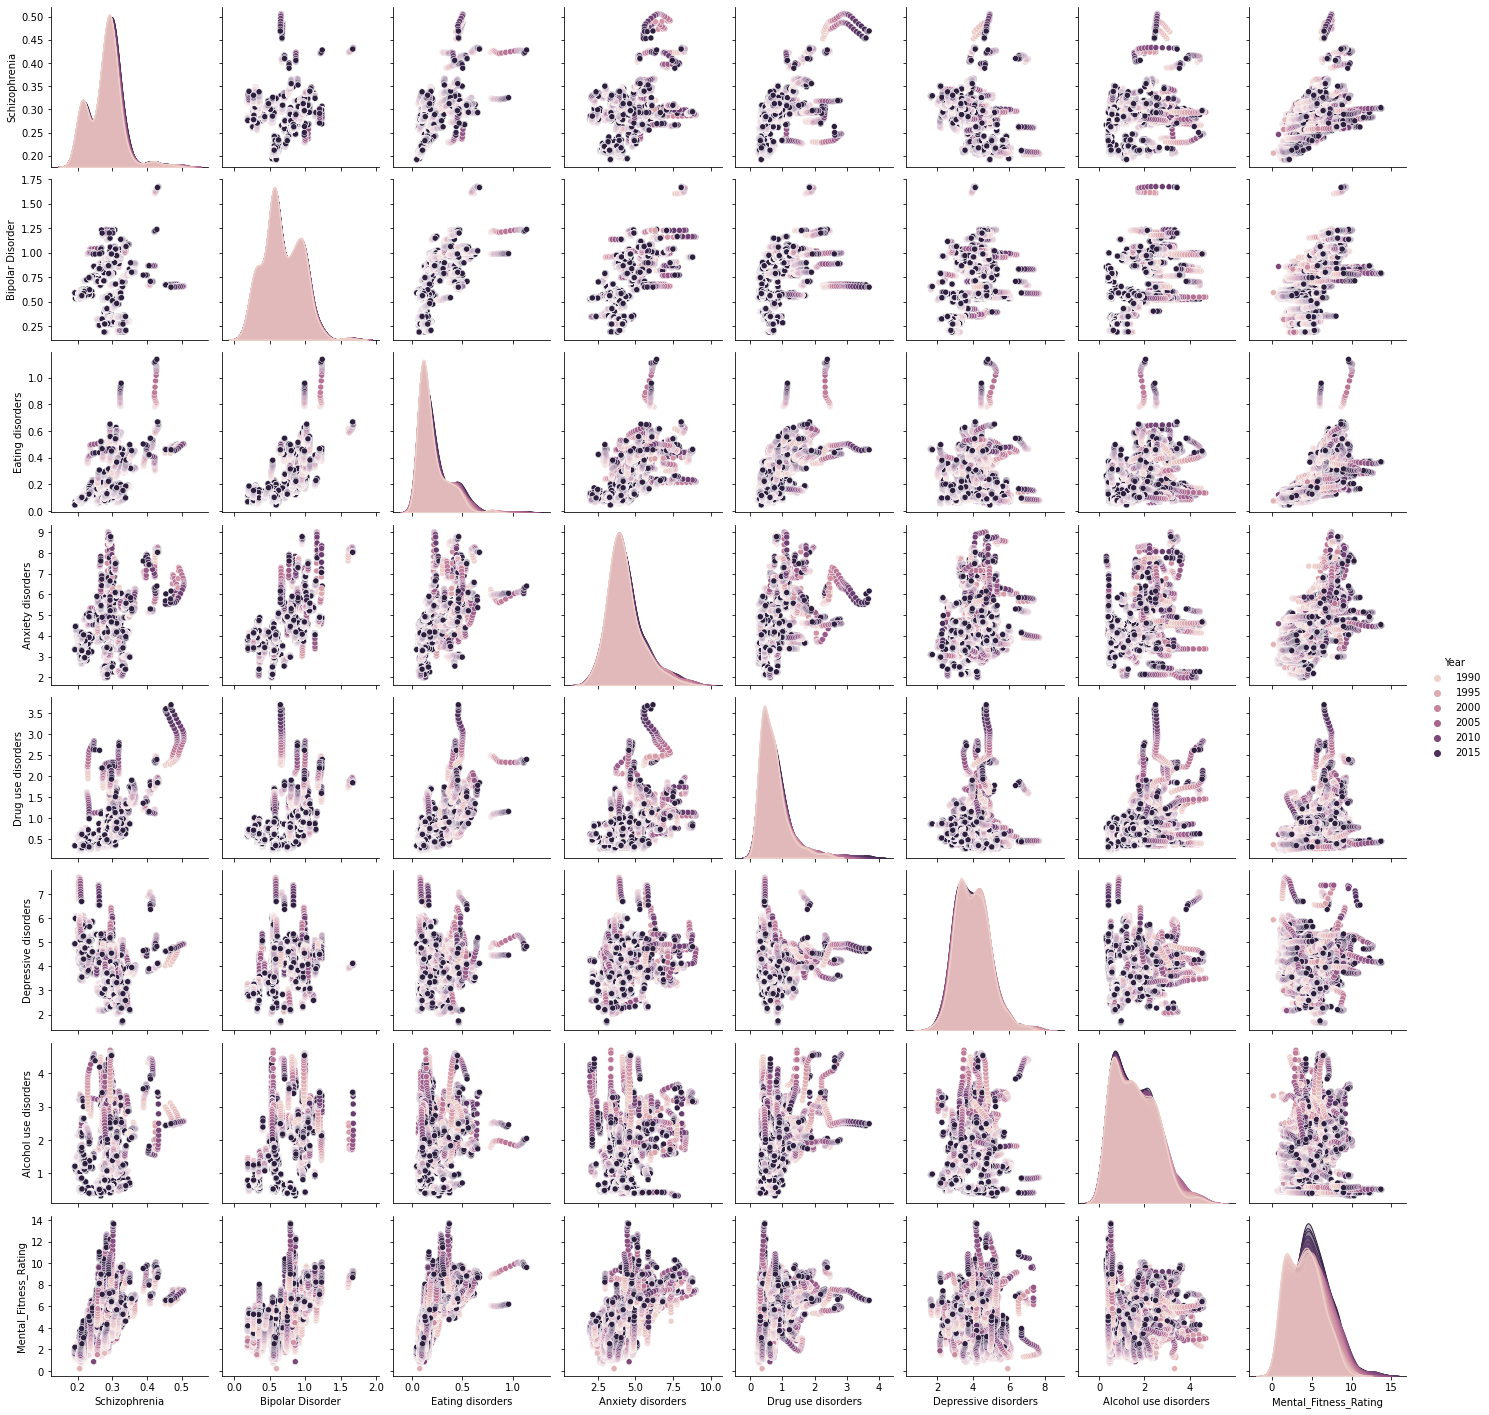

In [95]:
sn.pairplot(df3,hue='Year')
plt.show()

### YEARWISE VARIATIONS IN MENTAL FITNESS OF DIFFERENT COUNTRIES

In [15]:
fig4 = px.line(df3, x="Year", y="Mental_Fitness_Rating", color='Country',markers=True,color_discrete_sequence=['red','blue','green','white'],template='plotly_dark')
fig4.show()

### Transforming Non Numeric Labels into Numeric Labels

In [29]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
for i in df3.columns:
    if df3[i].dtype == 'object' :
        df3[i]=l.fit_transform(df3[i])

In [30]:
print(df3.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6840 entries, 0 to 6839
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Country                6840 non-null   int32  
 1   Code                   6840 non-null   int32  
 2   Year                   6840 non-null   int64  
 3   Schizophrenia          6840 non-null   float64
 4   Bipolar Disorder       6840 non-null   float64
 5   Eating disorders       6840 non-null   float64
 6   Anxiety disorders      6840 non-null   float64
 7   Drug use disorders     6840 non-null   float64
 8   Depressive disorders   6840 non-null   float64
 9   Alcohol use disorders  6840 non-null   float64
 10  Mental_Fitness_Rating  6840 non-null   float64
dtypes: float64(8), int32(2), int64(1)
memory usage: 587.8 KB
None


### Spliting The Data 
#### One dataset is used to train and other dataset is used to test the result

In [32]:
X = df3.drop('Mental_Fitness_Rating',axis=1)
y = df3['Mental_Fitness_Rating']

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2)

In [33]:
print(xtrain.dtypes)

Country                    int32
Code                       int32
Year                       int64
Schizophrenia            float64
Bipolar Disorder         float64
Eating disorders         float64
Anxiety disorders        float64
Drug use disorders       float64
Depressive disorders     float64
Alcohol use disorders    float64
dtype: object


In [122]:
print('X-Train shape: ',xtrain.shape)
print('X-test shape: ',xtest.shape)
print('y-Train shape: ',ytrain.shape)
print('y-test shape: ',ytest.shape)

X-Train shape:  (5472, 10)
X-test shape:  (1368, 10)
y-Train shape:  (5472,)
y-test shape:  (1368,)


## Using Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
lr = LinearRegression()
lr.fit(xtrain,ytrain)

# model evaluation for training set
ytrain_pred = lr.predict(xtrain)
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = (np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
r2 = r2_score(ytrain, ytrain_pred)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
MSE is 1.3714974374183053
RMSE is 1.1711094899360628
R2 score is 0.744760397991288


The model performance for testing set
--------------------------------------
MSE is 1.123299039226316
RMSE is 1.0598580278633154
R2 score is 0.7664866777948146


## Using Support Vector Regression 
#### Before scaling the values

In [124]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Instantiate the SVR model with your preferred kernel and other hyperparameters
svr = SVR(kernel='rbf', C=10, epsilon=0.1)

# Train the SVR model using the training data
svr.fit(xtrain, ytrain)

# Make predictions for the training set
ytrain_pred = svr.predict(xtrain)

# Calculate evaluation metrics for the training set
mse_train = mean_squared_error(ytrain, ytrain_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(ytrain, ytrain_pred)

# Print the model performance for the training set
print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_train))
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# Make predictions for the testing set
ytest_pred = svr.predict(xtest)

# Calculate evaluation metrics for the testing set
mse_test = mean_squared_error(ytest, ytest_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, ytest_pred)

# Print the model performance for the testing set
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))


The model performance for training set
--------------------------------------
MSE is 5.125855796693262
RMSE is 2.2640352905140992
R2 score is 0.04606355228427539


The model performance for testing set
--------------------------------------
MSE is 4.569933299795624
RMSE is 2.1377402320664745
R2 score is 0.049994462893526825


#### After Scaling the xtrain and xtest dataset and hyper tuning the C and Epsilon Values the mse and rmse values have decreased
#### R2 Score has increased 


In [125]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Instantiate the SVR model with your preferred kernel and other hyperparameters
svr = SVR(kernel='rbf', C=110, epsilon=0.001)

# Perform feature scaling on xtrain and xtest
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Train the SVR model using the scaled training data
svr.fit(xtrain_scaled, ytrain)

# Make predictions for the training set
ytrain_pred = svr.predict(xtrain_scaled)

# Calculate evaluation metrics for the training set
mse_train = mean_squared_error(ytrain, ytrain_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(ytrain, ytrain_pred)

# Print the model performance for the training set
print("The model performance for the training set")
print("--------------------------------------")
print('MSE is {}'.format(mse_train))
print('RMSE is {}'.format(rmse_train))
print('R2 score is {}'.format(r2_train))
print("\n")

# Make predictions for the testing set using the scaled data
ytest_pred = svr.predict(xtest_scaled)

# Calculate evaluation metrics for the testing set
mse_test = mean_squared_error(ytest, ytest_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, ytest_pred)

# Print the model performance for the testing set
print("The model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance for the training set
--------------------------------------
MSE is 0.02790477144103574
RMSE is 0.16704721320942695
R2 score is 0.9948068420965035


The model performance for testing set
--------------------------------------
MSE is 0.029563454674690414
RMSE is 0.17194026484419062
R2 score is 0.9938542985653186


### Now using different kernel selection (Linear , Poly , Sigmoid)

In [39]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Instantiate the SVR model with different kernels and other hyperparameters
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
svr_sigmoid = SVR(kernel='sigmoid', C=1.0, epsilon=0.1)

# Perform feature scaling on xtrain and xtest
scaler = StandardScaler()
xtrain_scaled = scaler.fit_transform(xtrain)
xtest_scaled = scaler.transform(xtest)

# Train the SVR models using the scaled training data
svr_linear.fit(xtrain_scaled, ytrain)
svr_poly.fit(xtrain_scaled, ytrain)
svr_sigmoid.fit(xtrain_scaled, ytrain)

# Make predictions for the training set using different kernels
ytrain_pred_linear = svr_linear.predict(xtrain_scaled)
ytrain_pred_poly = svr_poly.predict(xtrain_scaled)
ytrain_pred_sigmoid = svr_sigmoid.predict(xtrain_scaled)

# Calculate evaluation metrics for the training set using different kernels
mse_train_linear = mean_squared_error(ytrain, ytrain_pred_linear)
rmse_train_linear = np.sqrt(mse_train_linear)
r2_train_linear = r2_score(ytrain, ytrain_pred_linear)

mse_train_poly = mean_squared_error(ytrain, ytrain_pred_poly)
rmse_train_poly = np.sqrt(mse_train_poly)
r2_train_poly = r2_score(ytrain, ytrain_pred_poly)

mse_train_sigmoid = mean_squared_error(ytrain, ytrain_pred_sigmoid)
rmse_train_sigmoid = np.sqrt(mse_train_sigmoid)
r2_train_sigmoid = r2_score(ytrain, ytrain_pred_sigmoid)

# Print the model performance for the training set using different kernels
print("The model performance for the training set - Linear Kernel")
print("--------------------------------------")
print('MSE is {}'.format(mse_train_linear))
print('RMSE is {}'.format(rmse_train_linear))
print('R2 score is {}'.format(r2_train_linear))
print("\n")

print("The model performance for the training set - Polynomial Kernel")
print("--------------------------------------")
print('MSE is {}'.format(mse_train_poly))
print('RMSE is {}'.format(rmse_train_poly))
print('R2 score is {}'.format(r2_train_poly))
print("\n")

print("The model performance for the training set - Sigmoid Kernel")
print("--------------------------------------")
print('MSE is {}'.format(mse_train_sigmoid))
print('RMSE is {}'.format(rmse_train_sigmoid))
print('R2 score is {}'.format(r2_train_sigmoid))
print("\n")

# Make predictions for the testing set using different kernels
ytest_pred_linear = svr_linear.predict(xtest_scaled)
ytest_pred_poly = svr_poly.predict(xtest_scaled)
ytest_pred_sigmoid = svr_sigmoid.predict(xtest_scaled)

# Calculate evaluation metrics for the testing set using different kernels
mse_test_linear = mean_squared_error(ytest, ytest_pred_linear)
rmse_test_linear = np.sqrt(mse_test_linear)
r2_test_linear = r2_score(ytest, ytest_pred_linear)

mse_test_poly = mean_squared_error(ytest, ytest_pred_poly)
rmse_test_poly = np.sqrt(mse_test_poly)
r2_test_poly = r2_score(ytest, ytest_pred_poly)

mse_test_sigmoid = mean_squared_error(ytest, ytest_pred_sigmoid)
rmse_test_sigmoid = np.sqrt(mse_test_sigmoid)
r2_test_sigmoid = r2_score(ytest, ytest_pred_sigmoid)

# Print the model performance for the testing set using different kernels
print("The model performance for the testing set - Linear Kernel")
print("--------------------------------------")
print('MSE is {}'.format(mse_test_linear))
print('RMSE is {}'.format(rmse_test_linear))
print('R2 score is {}'.format(r2_test_linear))
print("\n")

print("The model performance for the testing set - Polynomial Kernel")
print("--------------------------------------")
print('MSE is {}'.format(mse_test_poly))
print('RMSE is {}'.format(rmse_test_poly))
print('R2 score is {}'.format(r2_test_poly))
print("\n")

print("The model performance for the testing set - Sigmoid Kernel")
print("--------------------------------------")
print('MSE is {}'.format(mse_test_sigmoid))
print('RMSE is {}'.format(rmse_test_sigmoid))
print('R2 score is {}'.format(r2_test_sigmoid))
print("\n")


The model performance for the training set - Linear Kernel
--------------------------------------
MSE is 1.5032491289726175
RMSE is 1.226070605215139
R2 score is 0.7202410307662215


The model performance for the training set - Polynomial Kernel
--------------------------------------
MSE is 1.0779977960026177
RMSE is 1.038266726810899
R2 score is 0.799381522042132


The model performance for the training set - Sigmoid Kernel
--------------------------------------
MSE is 3019.02654346514
RMSE is 54.945669014628805
R2 score is -560.8494882923759


The model performance for the testing set - Linear Kernel
--------------------------------------
MSE is 1.2436730793298982
RMSE is 1.1152009143333312
R2 score is 0.74146311681037


The model performance for the testing set - Polynomial Kernel
--------------------------------------
MSE is 0.9243721022991388
RMSE is 0.9614427191981532
R2 score is 0.8078399490928662


The model performance for the testing set - Sigmoid Kernel
---------------------

### Takeway points: 
##### The fact that the polynomial kernel performs better than the sigmoid kernel indicates that the data has some non-linear patterns, and the polynomial kernel is more capable of capturing these patterns compared to the sigmoid kernel. It's not surprising to see the sigmoid kernel as the worst fit because it is typically less flexible in representing complex patterns.

## Using Random Forest Generator 

In [50]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest Regressor model and fit it to the training data
rf = RandomForestRegressor()
rf.fit(xtrain, ytrain)

# Make predictions on the training data
ytrain_pred = rf.predict(xtrain)

# Calculate Mean Squared Error (MSE), RMSE, and R-squared score for training data
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)

# Print the performance metrics of the Random Forest Regressor model on the training set
print("Random Forest Regressor model performance on the training set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {} ".format(r2))

ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ytest_pred)

# Print the performance metrics of the Random Forest Regressor model on the training set
print("\n \nRandom Forest Regressor model performance on the testing set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

Random Forest Regressor model performance on the training set
------------------------------------------------------------
MSE: 0.004904417225288507
RMSE: 0.07003154450166373
R2 Score: 0.9990872739047739 

 
Random Forest Regressor model performance on the testing set
------------------------------------------------------------
MSE: 0.03001573866964162
RMSE: 0.17325050842534812
R2 Score: 0.9937602769962144


## Using Gradient  Boosting Regressor

In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Gradient Boosting Regressor model and fit it to the training data
gb = GradientBoostingRegressor()
gb.fit(xtrain, ytrain)

# Make predictions on the training data
ytrain_pred = gb.predict(xtrain)

# Calculate Mean Squared Error (MSE), RMSE, and R-squared score for training data
mse = mean_squared_error(ytrain, ytrain_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytrain, ytrain_pred)

# Print the performance metrics of the Gradient Boosting Regressor model on the training set
print("Gradient Boosting Regressor model performance on the training set")
print("--------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

ytest_pred = gb.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ytest_pred)

# Print the performance metrics of the Random Forest Regressor model on the training set
print("\n \nRandom Forest Regressor model performance on the testing set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

Gradient Boosting Regressor model performance on the training set
--------------------------------------------------------------
MSE: 0.23391714785744327
RMSE: 0.48364981945354146
R2 Score: 0.9564673486852918

 
Random Forest Regressor model performance on the testing set
------------------------------------------------------------
MSE: 0.23033003961303433
RMSE: 0.47992711906396196
R2 Score: 0.9521185980976743


## Evaluation :
### Comparing the different  regression models

In [57]:
## Using Linear Regression Model : 
ytest_pred = lr.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = (np.sqrt(mean_squared_error(ytest, ytest_pred)))
r2 = r2_score(ytest, ytest_pred)

print("The model performance using Linear Regression for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance using Linear Regression for testing set
--------------------------------------
MSE is 1.123299039226316
RMSE is 1.0598580278633154
R2 score is 0.7664866777948146


In [88]:
## Using SVM (Support Vector Regression) Model:
ytest_pred = svr.predict(xtest_scaled)

# Calculate evaluation metrics for the testing set
mse_test = mean_squared_error(ytest, ytest_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(ytest, ytest_pred)

# Print the model performance for the testing set
print("The model performance using SVM for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse_test))
print('RMSE is {}'.format(rmse_test))
print('R2 score is {}'.format(r2_test))

The model performance using SVM for testing set
--------------------------------------
MSE is 0.029563454674690414
RMSE is 0.17194026484419062
R2 score is 0.9938542985653186


In [61]:
## Using Gradient Boosting Regressor Model:
ytest_pred = gb.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ytest_pred)

# Print the performance metrics of the Random Forest Regressor model on the training set
print("Gradient Booster Regressor model performance on the testing set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

Gradient Booster Regressor model performance on the testing set
------------------------------------------------------------
MSE: 0.23033003961303433
RMSE: 0.47992711906396196
R2 Score: 0.9521185980976743


In [62]:
## Using Random Forest Regression Model:
ytest_pred = rf.predict(xtest)
mse = mean_squared_error(ytest, ytest_pred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest, ytest_pred)

# Print the performance metrics of the Random Forest Regressor model on the training set
print("Random Forest Regressor model performance on the testing set")
print("------------------------------------------------------------")
print("MSE: {}".format(mse))
print("RMSE: {}".format(rmse))
print("R2 Score: {}".format(r2))

Random Forest Regressor model performance on the testing set
------------------------------------------------------------
MSE: 0.03001573866964162
RMSE: 0.17325050842534812
R2 Score: 0.9937602769962144
